# $Topics$

- Decision Trees
- Ensembles
    - Bagging (incl. Random Forests)
    - Boosting (incl. Adaptive Boosting)
    
---    

### `1. Decision Trees`


### What is a tree?

> Decision tree classifiers are tree-like graphs, where nodes in the tree test certain conditions on a particular set of features (or a row of data), and branches split the [binary] decision towards the leaf nodes.
- Leaves represent lowest level in the graph and determine the class labels. 
- Optimal tree are trained by minimizing **Gini impurity**, or maximizing **information gain**


Since their development in the 1980s, decision trees have been the most widely deployed machine-learning. The fact that their output is a simple set-of-rules, they're easy to explain and intuitive to understand.

### How does a tree grow?

A decision tree uses this traditional
structure. 
- It starts with a single root node 
- that splits into multiple branches, 
- leading to further nodes, 
- each of which may further split or else terminate as a leaf node. 

Associated with each **nonleaf** node will be a $test$ or question that determines which branch to follow. The leaf nodes contain the $decisions$

> Each test/question at a branch node is formed using a Variable and a cut-off point(s). These Variables and Points are picked depending on which combinations result in lowering impurity or increasing information gain.

- All Zeros (impurity 0)  
- Half Zeros, Half Ones (impurity 1)  
- All Ones (impurity 0) 

At each branch node, we conduct a Greedy Search for the variable-cutoff combination that maximizes gain/minimizes impurity.

### Advantages of using Trees

The decision tree is a very convenient and efficient representation of knowledge as the output set of rules can be used in any programming language that implements the IF-THEN constructs.

### Tree Pruning (controlling the `max_depth`)

A full tree is often prone to overfitting issues. So we cut back the tree from its full depth.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.datasets import load_iris, load_digits
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = load_digits()['data']
y = load_digits()['target']

In [3]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.8, random_state=1234)

## Build the full tree

In [4]:
tree_1 = DecisionTreeClassifier()

In [5]:
tree_1.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
# Training Accuracy
Series(cross_val_score(tree_1, X_tr, y_tr, cv=10)).describe()[['min', 'mean', 'max']]

min     0.813793
mean    0.846367
max     0.886525
dtype: float64

In [7]:
# Test Accuracy
Series(cross_val_score(tree_1, X_te, y_te, cv=10)).describe()[['min', 'mean', 'max']]

min     0.647059
mean    0.731216
max     0.853659
dtype: float64

In [8]:
from sklearn.tree import export_graphviz

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [10]:
visualize_tree(tree_1, ['Feature_' + str(x) for x in range(X_tr.shape[0])])

In [16]:
!dot -Tpng dt.dot -o dt.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


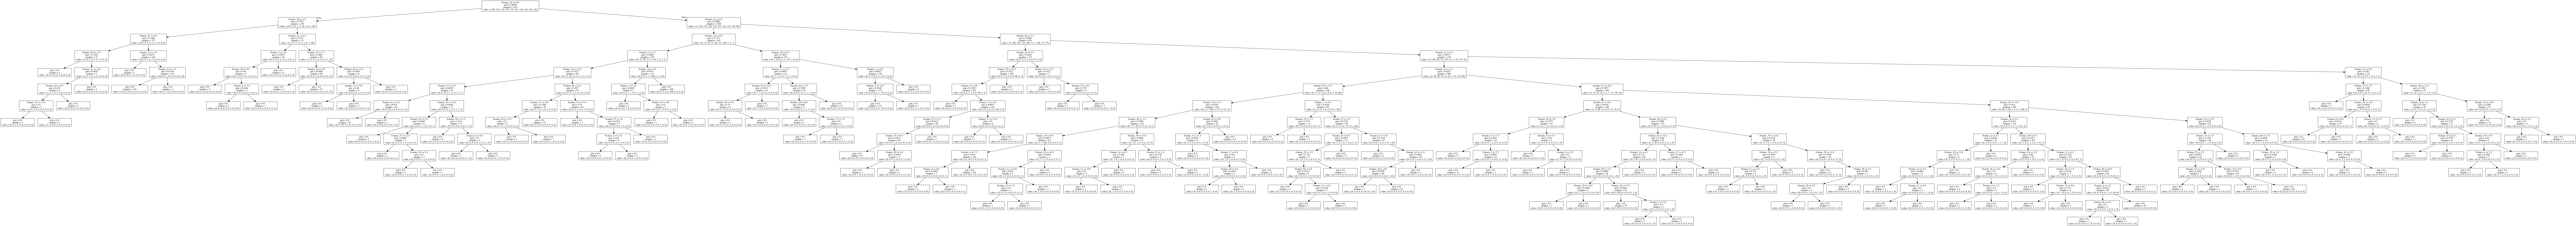

In [17]:
from IPython.display import Image
Image('dt.png')

## Build the best tree

In [18]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

tree_grid = {'max_depth': range(2, 12, 2),
            'min_samples_split': [20, 50, 100]}

C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
gscv_tree = GridSearchCV(estimator=DecisionTreeClassifier(), 
                         param_grid=tree_grid, 
                         verbose=True,
                         cv=5,
                         n_jobs=-1)

In [21]:
gscv_tree.fit(X_tr, y_tr)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [20, 50, 100], 'max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [22]:
gscv_tree.best_params_

{'max_depth': 10, 'min_samples_split': 20}

In [23]:
# Training Accuracy
Series(cross_val_score(gscv_tree.best_estimator_, 
                       X_tr, y_tr, cv=10)).describe()[['min', 'mean', 'max']]

min     0.737931
mean    0.817243
max     0.888112
dtype: float64

In [24]:
# Test Accuracy
Series(cross_val_score(gscv_tree.best_estimator_, 
                       X_te, y_te, cv=10)).describe()[['min', 'mean', 'max']]

min     0.65625
mean    0.72469
max     0.84375
dtype: float64

In [25]:
gscv_tree.grid_scores_

[mean: 0.32359, std: 0.00959, params: {'min_samples_split': 20, 'max_depth': 2},
 mean: 0.32359, std: 0.00959, params: {'min_samples_split': 50, 'max_depth': 2},
 mean: 0.32359, std: 0.00959, params: {'min_samples_split': 100, 'max_depth': 2},
 mean: 0.56298, std: 0.03066, params: {'min_samples_split': 20, 'max_depth': 4},
 mean: 0.56089, std: 0.03229, params: {'min_samples_split': 50, 'max_depth': 4},
 mean: 0.55672, std: 0.03495, params: {'min_samples_split': 100, 'max_depth': 4},
 mean: 0.75365, std: 0.02764, params: {'min_samples_split': 20, 'max_depth': 6},
 mean: 0.73556, std: 0.02612, params: {'min_samples_split': 50, 'max_depth': 6},
 mean: 0.71120, std: 0.02680, params: {'min_samples_split': 100, 'max_depth': 6},
 mean: 0.81420, std: 0.01397, params: {'min_samples_split': 20, 'max_depth': 8},
 mean: 0.79262, std: 0.01916, params: {'min_samples_split': 50, 'max_depth': 8},
 mean: 0.75226, std: 0.01708, params: {'min_samples_split': 100, 'max_depth': 8},
 mean: 0.82672, std: 0.0

---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

`Bagging`

Bagging is an ensemble method for classification (or regression analysis) in which individual models are trained by random re-sampling (with replacement) of data, and the final decision is made by voting among individual models with equal weights (or averaging for regression analysis).

# boosting

In [150]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [151]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [152]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [153]:
gscv_ada.fit(X_tr, y_tr)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [154]:
gscv_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 800}

In [155]:
clf_ada = gscv_ada.best_estimator_

In [161]:
gscv_ada.best_score_

0.75922059846903267

In [156]:
from sklearn.cross_validation import cross_val_score

In [157]:
print Series(cross_val_score(clf_ada, 
                             X_tr, y_tr, cv=10)).describe()[['min', 'mean', 'max']]

print Series(cross_val_score(clf_ada, 
                             X_te, y_te, cv=10)).describe()[['min', 'mean', 'max']]

min     0.716216
mean    0.771929
max     0.813793
dtype: float64
min     0.470588
mean    0.697326
max     0.885714
dtype: float64


In [160]:
Series(cross_val_score(clf_ada, X_te, y_te, cv=10))

0    0.731707
1    0.675000
2    0.564103
3    0.789474
4    0.685714
5    0.885714
6    0.470588
7    0.764706
8    0.781250
9    0.625000
dtype: float64